# <font color=blue><div class="alert alert-block alert-info">PROJECT 4: Predict number of comments of a Reddit.com post.<br><br>by: Richard Giegerich<br><br>January 2018</div></font>

# <div class="alert alert-block alert-info">STEP 1: Establish the goal, scope of work and expected outcome of the project:</div>

## Goal:  The intent of this project is to derive a Machine Learning model that can make the best possible prediction about whether a Reddit.com post will garner more or less than the median number of comments than other posts receive.

## Scope of work:  Data will be acquired via scraping the Reddit.com homepage to gather information on the latest "hot" threads.  This data will be fed into various models that will have varying predictive abilities.

## Minimum data to be collected on each post:
-  Title of the post
-  Associated subreddit of the post
-  Length of time since it was first posted
-  Number of comments that the post has received

## Outcome:  Predictive model for number of comments of a Reddit.com post.  Also, through Natural Language Processing, a discussion will also follow about what characteristics of a post can give it a better chance at gaining more comments.

# <div class="alert alert-block alert-info">STEP 2: Gather data from Reddit.com:</div>

## Webscrape post info from Reddit.com:

### Import time module to use sleep function to scrape Reddit website slow enough to allow continuous scraping:

In [313]:
import time
print "hello"
time.sleep(3)
print "bye"

hello
bye


### Set up URL and run test scrapes one page at a time before running continuous scraping program:

In [314]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

In [315]:
URL = "http://www.reddit.com"

In [316]:
driver = webdriver.Chrome(executable_path='./chromedriver')
driver.get(URL)
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
html[:2500]

u'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en" class=" js cssanimations csstransforms"><head><title>reddit: the front page of the internet</title><meta name="keywords" content=" reddit, reddit.com, vote, comment, submit " /><meta name="description" content="reddit: the front page of the internet" /><meta name="referrer" content="always" /><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><link type="application/opensearchdescription+xml" rel="search" href="/static/opensearch.xml" /><link rel="canonical" href="https://www.reddit.com/" /><meta name="viewport" content="width=1024" /><link rel="dns-prefetch" href="//out.reddit.com" /><link rel="preconnect" href="//out.reddit.com" /><link rel="apple-touch-icon" sizes="57x57" href="//www.redditstatic.com/desktop2x/img/favicon/apple-icon-57x57.png" /><link rel="apple-touch-icon" sizes="60x60" href="//www.redditstatic.com/desktop2x/img/favicon/apple-icon-60x60.png" /><link rel="apple-touc

#### Use BeautifulSoup to parse HTML from website and look at scraped titles:

In [318]:
soup = BeautifulSoup(html, 'lxml')
titles = soup.findAll("a", {"data-event-action": "title"})

In [319]:
for elem in titles:
    print elem.text

Hey Reddit, we've created a special space full of fun, weird and unique items that you probably didn't even know existed on Amazon! Shop our endless finds today!
Rainy days in NYC
My dad and I are a great reminder that genetics aren’t an exact science
A gentleman
Everything is better with a combat roll.
Death and the Dog
When you’re suspended from hogwarts
Dan Bilzerian murdered by Diplo
The light at the end of the wave.
2meirl4meirl
Pizza slid out of the box.
ENLIGHTENED BOYE
TIL during the first combat usage of the American Sidewinder missile in 1958, a dud hit an enemy plane and became lodged without exploding. The pilot returned to base, allowing Soviet engineers to study it and reverse-engineer a nearly identical missile for their own use.
On April fools, Snapchat should remove filters from sent pictures so the recipient just gets funny faces.
Fitness tracking app gives away location of secret US army bases
"I'm prepared to be shot," says one protester as Russia’s youth takes the 

In [320]:
len(titles)

26

## Write 4 functions to extract title, time, subreddit and number of comments from the HTML info obtained from the webscrape:

### FUNCTION TO GET TITLES:

In [321]:
def get_titles(result):
    title_list = []
    try:
        soup = BeautifulSoup(result, 'lxml')
        titles = soup.findAll("a", {"data-event-action": "title"})
        for elem in titles:
            title_list.append(elem.text)
        return title_list
    except:
        return title_list

In [322]:
get_titles(html)

[u"Hey Reddit, we've created a special space full of fun, weird and unique items that you probably didn't even know existed on Amazon! Shop our endless finds today!",
 u'Rainy days in NYC',
 u'My dad and I are a great reminder that genetics aren\u2019t an exact science',
 u'A gentleman',
 u'Everything is better with a combat roll.',
 u'Death and the Dog',
 u'When you\u2019re suspended from hogwarts',
 u'Dan Bilzerian murdered by Diplo',
 u'The light at the end of the wave.',
 u'2meirl4meirl',
 u'Pizza slid out of the box.',
 u'ENLIGHTENED BOYE',
 u'TIL during the first combat usage of the American Sidewinder missile in 1958, a dud hit an enemy plane and became lodged without exploding. The pilot returned to base, allowing Soviet engineers to study it and reverse-engineer a nearly identical missile for their own use.',
 u'On April fools, Snapchat should remove filters from sent pictures so the recipient just gets funny faces.',
 u'Fitness tracking app gives away location of secret US ar

In [323]:
len(get_titles(html))

26

### FUNCTION TO GET TIMES:

In [324]:
def get_times(result):
    times_list = []
    try:
        soup = BeautifulSoup(result, 'lxml')
        times = soup.findAll("time", {"class": "live-timestamp"})
        for elem in times:
            times_list.append(elem.text)
        return times_list
    except:
        return times_list

In [325]:
get_times(html)

[u'5 hours ago',
 u'4 hours ago',
 u'4 hours ago',
 u'4 hours ago',
 u'3 hours ago',
 u'4 hours ago',
 u'6 hours ago',
 u'5 hours ago',
 u'6 hours ago',
 u'5 hours ago',
 u'5 hours ago',
 u'7 hours ago',
 u'5 hours ago',
 u'6 hours ago',
 u'8 hours ago',
 u'7 hours ago',
 u'3 hours ago',
 u'8 hours ago',
 u'7 hours ago',
 u'5 hours ago',
 u'7 hours ago',
 u'7 hours ago',
 u'7 hours ago',
 u'8 hours ago',
 u'8 hours ago']

In [326]:
len(get_times(html))

25

### FUNCTION TO GET SUBREDDIT:

In [327]:
def get_sub(result):
    sub_list = []
    try:
        soup = BeautifulSoup(result, 'lxml')
        subs = soup.findAll("a", {"class": "subreddit hover may-blank"})
        for elem in subs:
            sub_list.append(elem.text[2:])
        return sub_list
    except:
        return sub_list

In [328]:
get_sub(html)

[u'CozyPlaces',
 u'pics',
 u'gifs',
 u'nevertellmetheodds',
 u'wholesomememes',
 u'funny',
 u'MurderedByWords',
 u'woahdude',
 u'2meirl4meirl',
 u'Wellthatsucks',
 u'rarepuppers',
 u'todayilearned',
 u'Showerthoughts',
 u'news',
 u'worldnews',
 u'pics',
 u'IAmA',
 u'aww',
 u'funny',
 u'comics',
 u'mildlyinfuriating',
 u'technology',
 u'MEOW_IRL',
 u'pics',
 u'videos']

In [329]:
len(get_sub(html))

25

### FUNCTION TO GET NUMBER OF COMMENTS:

In [330]:
def get_comments(result):
    comments_list = []
    try:
        soup = BeautifulSoup(result, 'lxml')
        comms = soup.findAll("a", {"data-event-action": "comments"})
        for elem in comms:
            comments_list.append(elem.text.split()[0])
        return comments_list
    except:
        return comments_list

In [331]:
get_comments(html)

[u'500',
 u'2310',
 u'785',
 u'268',
 u'586',
 u'339',
 u'1222',
 u'48',
 u'285',
 u'519',
 u'84',
 u'790',
 u'211',
 u'396',
 u'2507',
 u'338',
 u'433',
 u'202',
 u'330',
 u'34',
 u'157',
 u'435',
 u'72',
 u'1256',
 u'2215']

In [332]:
len(get_comments(html))

25

## The URL for successive webpages has a predictable pattern:<br>
->    www.reddit.com/?count=<font color=blue>X</font>&after=<font color=red>Y</font>
## There is a counter that increments by 25 (<font color=blue>X</font>) and also a unique page ID (<font color=red>Y</font>) that came from the previous page. I will set up a function that finds that ID on the currect page and stores it in a variable called last:

In [333]:
def last_id(soup):
    last = soup.find("span", {"class":'next-button'}).a['href'][-9:]
    return last

In [334]:
last_id(soup)

't3_7tluwk'

In [335]:
soup.find("span", {"class":'next-button'}).a['href']

'https://www.reddit.com/?count=25&after=t3_7tluwk'

In [336]:
soup.find("span", {"class":'next-button'}).a['href'][-9:]

't3_7tluwk'

## Run a few scrapes in succession to make sure previous page ID number is working correctly using span class to get full next page URL:

In [337]:
driver = webdriver.Chrome(executable_path='./chromedriver')

driver.get('https://www.reddit.com')
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
lastid = soup.find("span", {"class":'next-button'}).a['href'][-9:]
print lastid

url = 'http://www.reddit.com/?count={}&after={}'.format(25, lastid)
print url

driver = webdriver.Chrome(executable_path='./chromedriver')
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
lastid = soup.find("span", {"class":'next-button'}).a['href'][-9:]
print lastid

url = 'http://www.reddit.com/?count={}&after={}'.format(50, lastid)
print url

driver = webdriver.Chrome(executable_path='./chromedriver')
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
lastid = soup.find("span", {"class":'next-button'}).a['href'][-9:]
print lastid

t3_7tln3x
http://www.reddit.com/?count=25&after=t3_7tln3x
t3_7tl7xm
http://www.reddit.com/?count=50&after=t3_7tl7xm
t3_7tkh82


## Try out last_id function inside of a 25 count loop to generate scrapes of successive pages:

In [338]:
from selenium import webdriver
import time

max_results = 200 

results = []
titles = []

driver = webdriver.Chrome(executable_path='./chromedriver')
driver.get('https://www.reddit.com')
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
lastid = last_id(soup)
print lastid
for i in range(25, max_results, 25):
    url = "http://www.reddit.com/?count={}&after={}".format(i, lastid)
    print url
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    titles.append(get_titles(html))
    lastid = last_id(soup)
    print lastid
    print i
    time.sleep(3)


t3_7tnibk
http://www.reddit.com/?count=25&after=t3_7tnibk
t3_7tl7xm
25
http://www.reddit.com/?count=50&after=t3_7tl7xm
t3_7tkh82
50
http://www.reddit.com/?count=75&after=t3_7tkh82
t3_7tk5nl
75
http://www.reddit.com/?count=100&after=t3_7tk5nl
t3_7tlg5c
100
http://www.reddit.com/?count=125&after=t3_7tlg5c
t3_7tke3u
125
http://www.reddit.com/?count=150&after=t3_7tke3u
t3_7tjvyp
150
http://www.reddit.com/?count=175&after=t3_7tjvyp
t3_7tm7li
175


In [345]:
len(titles)

7

In [340]:
titles

[[u"Hey Reddit, we've created a special space full of fun, weird and unique items that you probably didn't even know existed on Amazon! Shop our endless finds today!",
  u'When you reach 100 years old in Barbados, you get a stamp in your honour. Lovely.',
  u'A girl from my hometown got suspended from school after posting this video to spread awareness of our broken system that deals with bullying. This was made in response to a classmate committing suicide in the week prior to filming this.',
  u'Always check to make sure you switched to your alt',
  u"An 8 year old's microbiological handprint after playing outside",
  u'China\u2019s latest energy megaproject shows that coal really is on the way out: The Chinese province of Anhui built a massive floating solar farm on top of an abandoned coal mine. An even larger floating solar plant will come online by May 2018.',
  u"and that's the way it goes",
  u'Early morning on Kauai, Hawaii [OC] [3242x4752]',
  u'Hector v Dragon with FE7 anima

In [341]:
print get_titles(html)

[u"There is no shame in getting help. Talk to an online therapist tonight. You're worth it.", u'My mums Haworthia Zebra plant, she has no idea how long it\u2019s been growing but it\u2019s flowered for the past 2/3 years. We\u2019re finally removing it from this container tomorrow', u'My friend crocheted 336 granny squares to make this for her son.', u"I was gonna make fun of his name, but I'll leave that for another day", u'[Celeste] Not pictured: the 857 deaths it took over those two hours to finish this C-Side.', u'Shirley was the best.', u'Trump Warns Removing Confederate Statues Could Be Slippery Slope To Eliminating Racism Entirely', u'Anon Helps the Elderly', u"'Blade Runner 2049,' 'Logan,' 'Shape of Water' Top Art Directors Guild Awards", u'Fleeing idiot criminal gets caught by the police.', u'My Backyard in Fairfield, CT. (2448x2448) [OC]', u'My great grandmother turned 100 on Thursday - She lives at home, reads the bible without glasses and supplies the whole family with sock

In [346]:
len(titles[0])

26

## While I was able to obtain repetitive scrapes of Reddit.com to gather the necessary data for my models, I've noticed a problem.  My scrapes are gathering info for 25 times, subreddits and comment counts, however, the scrapes are generating lists of 26 titles.  This will not be suitable for a DataFrame structure.  For the sake of time, I will use a .csv file containing HTML scrapes of over 5000 posts. (Sourced by: Sophie Tabac)

# <div class="alert alert-block alert-info">STEP 3: Look at data and perform any EDA to prepare for modeling:</div>

### Import needed programming modules and import/convert .csv data to DataFrame data type.  Look at sample of data and attributes:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
reddit = pd.read_csv('./datasets/reddit_scrape.csv')

In [4]:
reddit.head(2)

,Unnamed: 0,created_at,id,num_comments,subreddit,time_delta,time_now,title,upvotes
0,0,2018-01-22 16:36:35,470616764,1153,gifs,0 days 04:24:57.883078000,2018-01-22 21:01:32.883070,Finnish ski jumping team,86005
1,1,2018-01-22 16:37:28,470617063,238,pics,0 days 04:24:04.883093000,2018-01-22 21:01:32.883092,Super excited about motherhood,20336


In [5]:
reddit.shape

(5567, 9)

In [6]:
len(reddit['title'].unique())

5405

#### There are 5567 rows of data, but only 5405 unique posts. Duplicates have occured through webscraping. Duplicates will be dropped:

In [7]:
reddit.drop_duplicates(subset='title', keep='first', inplace=True)

In [8]:
reddit.shape

(5405, 9)

#### DataFrame is pared down to only the 5405 unique entries.

## Let's look at number of comments and split the data for this column into a binary: 1 if number is more than the median and 0 if it is less

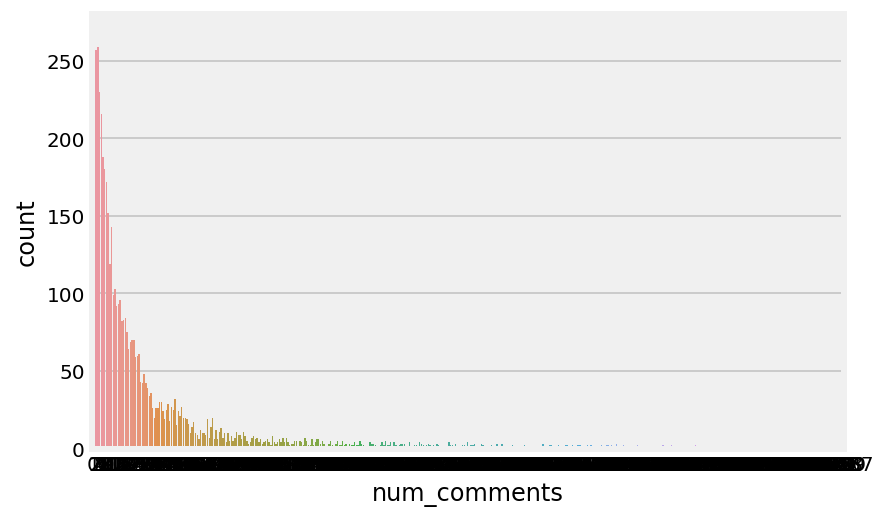

In [9]:
ax = sns.countplot(x="num_comments", data=reddit)

In [10]:
comm_mean = reddit['num_comments'].mean()
comm_median = reddit['num_comments'].median()
print 'Comments median is: ', comm_median
print 'Comments mean is: ', round(comm_mean,2)

Comments median is:  15.0
Comments mean is:  67.73


In [11]:
reddit['comm_range'] = [1 if x > comm_median else 0 for x in reddit['num_comments']]

In [12]:
reddit['comm_range'].value_counts()

0    2755
1    2650
Name: comm_range, dtype: int64

### Let's look at number of posts that each subreddit had:

In [13]:
subred_counts = pd.DataFrame(reddit['subreddit'].value_counts())
subred_counts

,subreddit
DDLC,90
aww,87
funny,84
eagles,76
reddevils,75
todayilearned,50
Patriots,48
PewdiepieSubmissions,47
PrequelMemes,43
memes,42


In [14]:
subred_counts.subreddit.values

array([90, 87, 84, ...,  1,  1,  1])

In [17]:
subred_counts.head()

,subreddit
DDLC,90
aww,87
funny,84
eagles,76
reddevils,75


### Let's look at total number of comments that each subreddit had:

In [18]:
subred_num_tot = reddit[['subreddit','num_comments']].groupby(by='subreddit', sort=True, as_index=False).sum().sort_values(by='num_comments',ascending=False)

In [19]:
subred_num_tot.head(10)

,subreddit,num_comments
61,AskReddit,65815
1393,pics,10072
1333,news,9106
1589,todayilearned,7887
1665,worldnews,7338
1102,funny,7238
1633,videos,6205
1037,eagles,5414
596,PoliticalHumor,4697
1471,science,4598


In [20]:
subred_num_tot.rename(index=str, columns={'subreddit': 'Subreddit', 'num_comments': 'Total_Num_Comments'}, inplace=True)

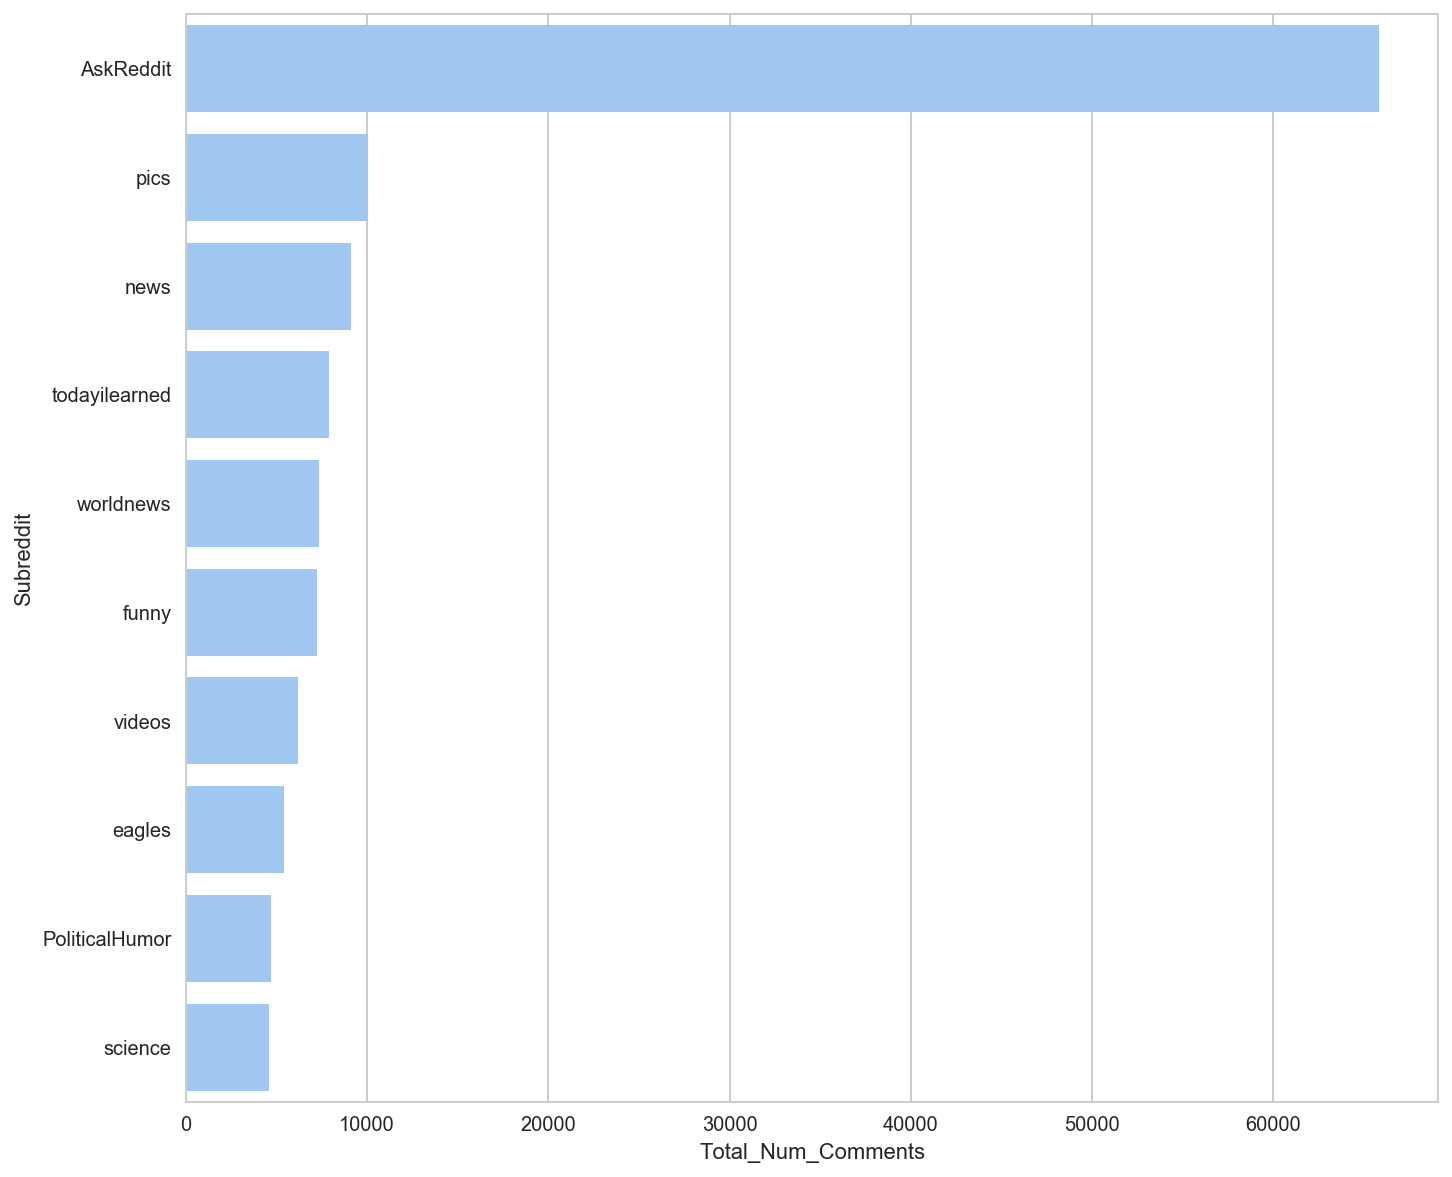

In [21]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 10))

sns.set_color_codes("pastel")
sns.barplot(x="Total_Num_Comments", y="Subreddit", data=subred_num_tot[:10],
            label="Comments", color="b")

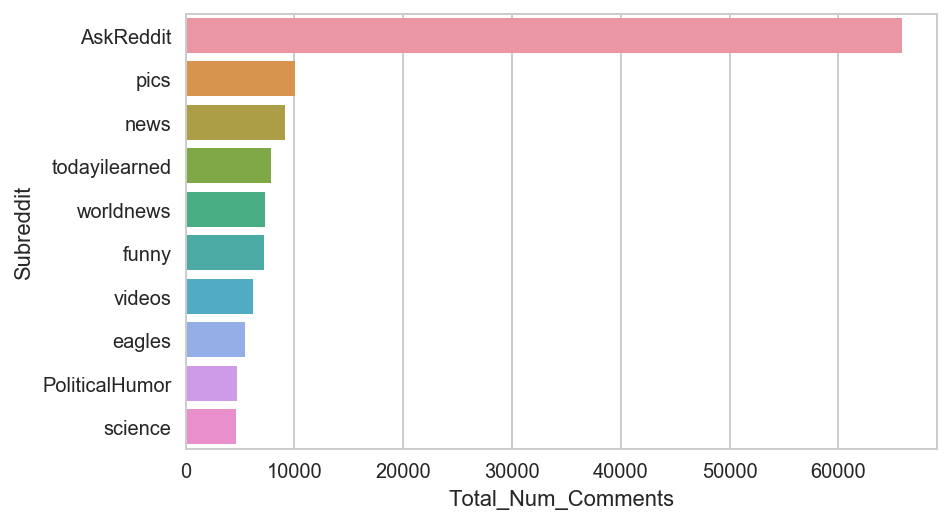

In [475]:
sns.barplot(x='Total_Num_Comments', y='Subreddit', orient='h', data=subred_num_tot[:10])

### Let's look at average number of comments that each subreddit had:

In [393]:
subred_num_avg = reddit[['subreddit','num_comments']].groupby(by='subreddit', sort=True, as_index=False).mean().round().sort_values(by='num_comments',ascending=False)

In [394]:
subred_num_avg.head(10)

,subreddit,num_comments
61,AskReddit,1645.0
1062,explainlikeimfive,1443.0
1159,happy,1329.0
369,IAmA,1007.0
980,coolguides,924.0
177,ColorizedHistory,916.0
1386,personalfinance,744.0
241,Documentaries,740.0
1523,sports,712.0
1471,science,657.0


In [467]:
subred_num_avg.rename(index=str, columns={'subreddit': 'Subreddit', 'num_comments': 'Average_Num_Comments'}, inplace=True)

In [468]:
subred_num_avg.head(1)

,Subreddit,Average_Num_Comments
61,AskReddit,1645.0


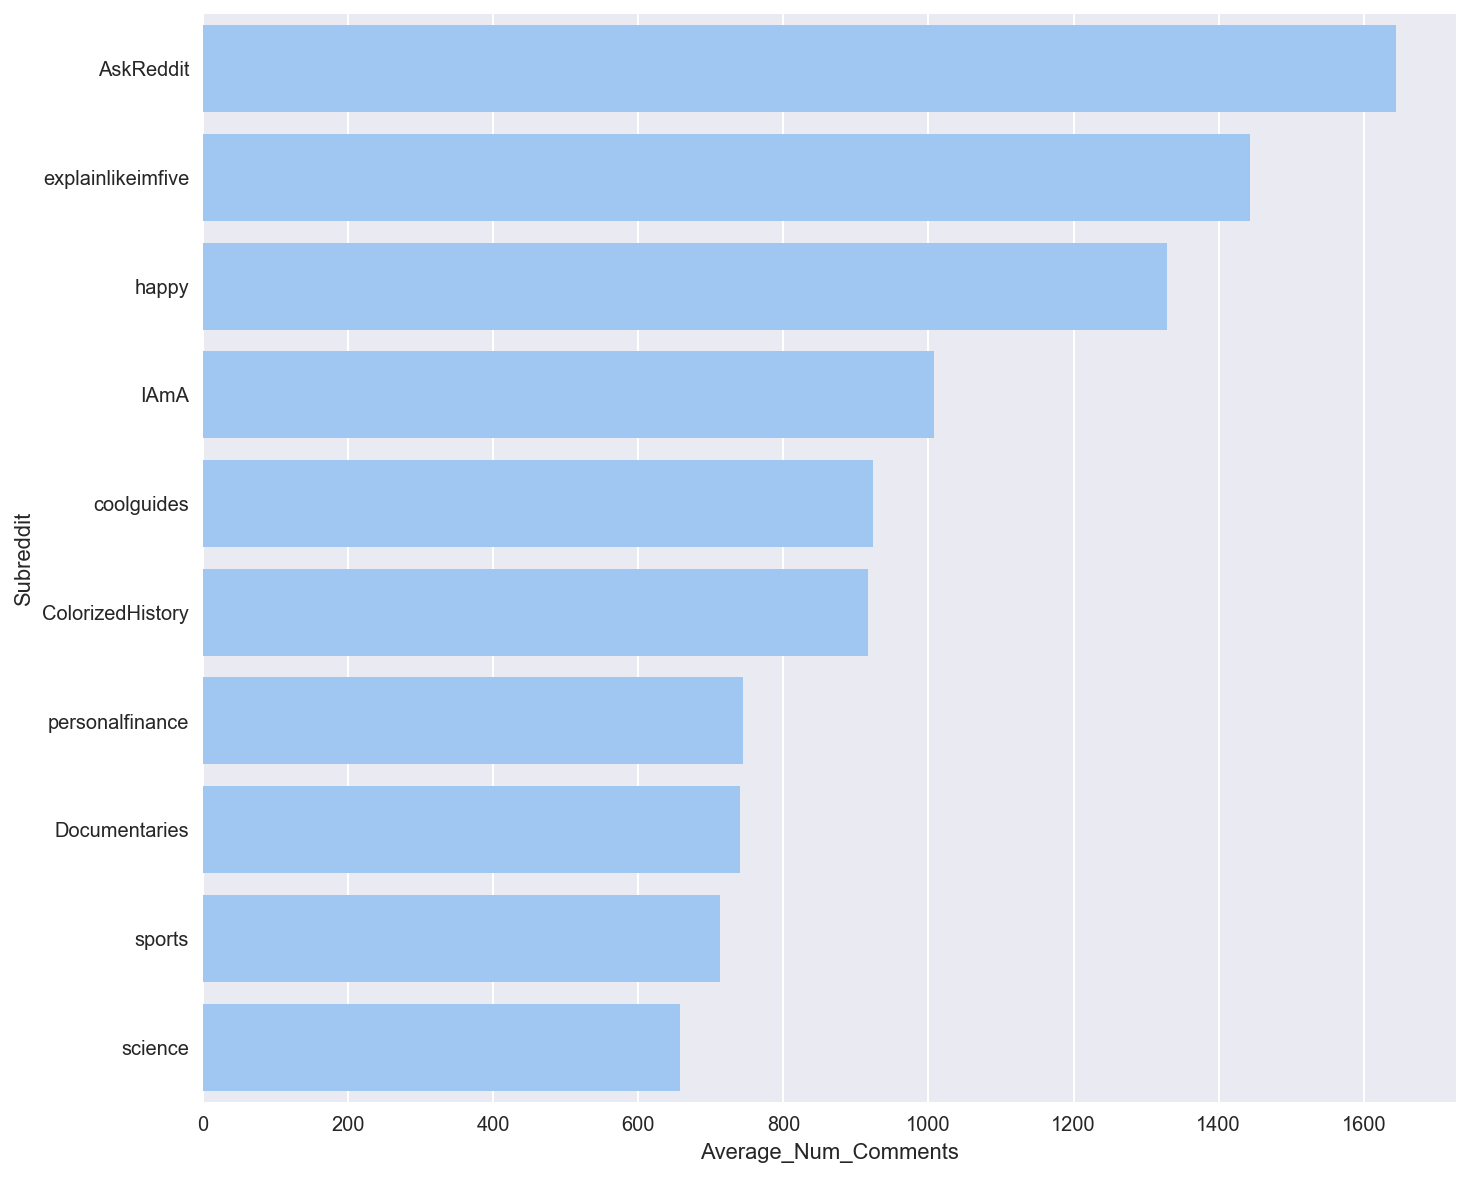

In [470]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 10))

sns.set_color_codes("pastel")
sns.barplot(x="Average_Num_Comments", y="Subreddit", data=subred_num_avg[:10], color="b")

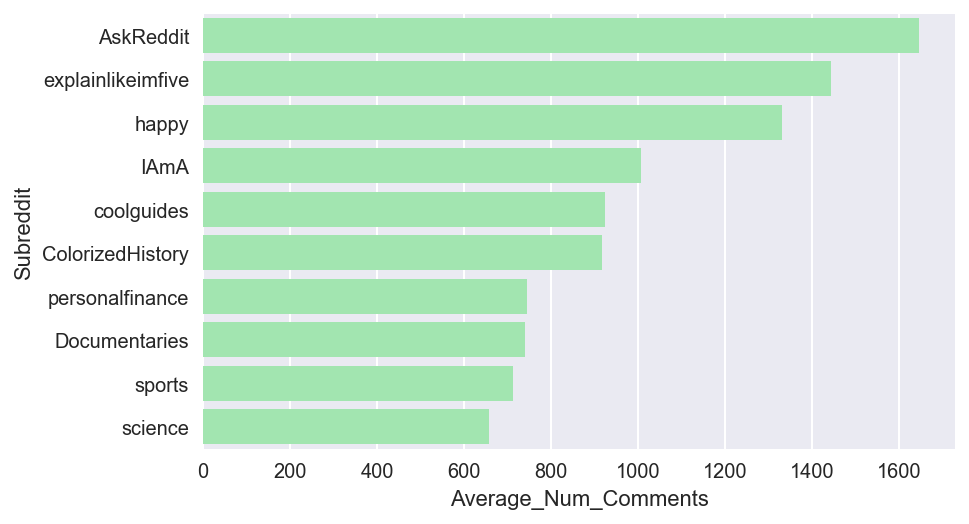

In [471]:
sns.barplot(x='Average_Num_Comments', y='Subreddit', orient='h', data=subred_num_avg[:10], color='g')

### A closer look at why AskReddit has so many total comments shows 1 very popular post (>35,000):

In [397]:
askreddit = reddit[reddit['subreddit'] == 'AskReddit']

In [398]:
len(askreddit)

40

In [399]:
askreddit['num_comments'].value_counts().sort_index(ascending=False)[:10]

35437    1
4620     1
3636     1
2248     1
2159     1
1829     1
1825     1
1425     1
1313     1
1291     1
Name: num_comments, dtype: int64

# <div class="alert alert-block alert-info">STEP 4: Run various predictive models on different feature sets:</div>

### The baseline accuracy is the best we could do by merely guessing whether or not a post gets a high number of comments or a low number.  This will be the benchmark for all models to beat.  Before preparing any models I will compute this baseline accuracy for predicting whether a Reddit post will get more or less than the median number (15) of comments:

In [400]:
baseline = 1 - reddit['comm_range'].mean()
print 'Baseline accuracy is:', round(baseline, 2)

Baseline accuracy is: 0.51


## Import models from Sklearn:

In [484]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [485]:
len(np.unique(reddit['subreddit']))

1682

## Establish X feature variable and y target variable.  Craate dummy variables of different subreddits:

In [486]:
X = reddit['subreddit']
y = reddit['comm_range']

In [487]:
X = pd.get_dummies(X, prefix='sub')

In [488]:
X.head(2)

,sub_13or30,sub_195,sub_2healthbars,sub_2meirl42meirl4meirl,sub_2meirl4meirl,sub_30ROCK,sub_3Dprinting,sub_40kLore,sub_49ers,sub_4PanelCringe,...,sub_xboxone,sub_xkcd,sub_xmen,sub_xxfitness,sub_yesyesyesyesno,sub_ynab,sub_youdontsurf,sub_youtube,sub_youtubehaiku,sub_zelda
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <div class="alert alert-block alert-warning">MODEL #1: <br>Feature(s) - Subreddit <br>Model - RandomForest</div>

In [489]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)

scores = cross_val_score(rf, X, y, cv=skf)
print "Cross-validated RF scores based on subreddit:", scores
print "Mean score:", scores.mean()

Cross-validated RF scores based on subreddit: [ 0.64292322  0.62719704  0.66512488  0.64384829  0.55319149]
Mean score: 0.626456984274


### <div class="alert alert-block alert-warning">MODEL #2: <br>Feature(s) - Subreddit + frequency of certain words <br>Model - RandomForest</div>

### Create extra features based on the frequency of certain words to see if I can improve predictive power of the model:

In [490]:
reddit['title'] = reddit['title'].map(lambda x: x.lower())

In [491]:
reddit.head()

,Unnamed: 0,created_at,id,num_comments,subreddit,time_delta,time_now,title,upvotes,comm_range,curse_words,fun_words,happy_words,vice_words,vader_neg,vader_pos,vader_neu,vader_compound,title_len
0,0,2018-01-22 16:36:35,470616764,1153,gifs,0 days 04:24:57.883078000,2018-01-22 21:01:32.883070,finnish ski jumping team,86005,1,0,0,0,0,0.000,0.000,1.000,0.0000,4
1,1,2018-01-22 16:37:28,470617063,238,pics,0 days 04:24:04.883093000,2018-01-22 21:01:32.883092,super excited about motherhood,20336,1,0,0,0,0,0.000,0.759,0.241,0.7430,4
2,2,2018-01-22 16:50:12,470621440,844,funny,0 days 04:11:20.883101000,2018-01-22 21:01:32.883100,messing with the new guy.,17611,1,0,0,0,0,0.000,0.000,1.000,0.0000,5
3,3,2018-01-22 17:25:20,470633617,380,space,0 days 03:36:12.883109000,2018-01-22 21:01:32.883108,nasa cancels and postpones all of their public...,11178,1,0,0,0,0,0.200,0.000,0.800,-0.4588,18
4,4,2018-01-22 15:41:56,470598246,430,technology,0 days 05:19:36.883120000,2018-01-22 21:01:32.883118,new bill would stop states from banning broadb...,13467,1,0,0,0,0,0.216,0.000,0.784,-0.2960,9


In [492]:
curse_words = 'fuck|shit|dick|cock|bullshit|cunt'
fun_words = 'fun|funny|cat|dog|kitten|puppy|animal'
happy_words = 'life|love|family|happy|happiness'
vice_words = 'sex|drugs|money'

print "Number of titles with curse words: ", len(reddit[reddit['title'].str.contains(curse_words)])
print "Number of titles with fun words: ", len(reddit[reddit['title'].str.contains(fun_words)])
print "Number of titles with happy words: ", len(reddit[reddit['title'].str.contains(happy_words)])
print "Number of titles with vice words: ", len(reddit[reddit['title'].str.contains(vice_words)])

Number of titles with curse words:  79
Number of titles with fun words:  228
Number of titles with happy words:  177
Number of titles with vice words:  41


In [493]:
curse_array = reddit['title'].str.contains(curse_words).values
fun_array = reddit['title'].str.contains(fun_words).values
happy_array = reddit['title'].str.contains(happy_words).values
vice_array = reddit['title'].str.contains(vice_words).values

reddit['curse_words'] = curse_array.astype(int)
reddit['fun_words'] = fun_array.astype(int)
reddit['happy_words'] = happy_array.astype(int)
reddit['vice_words'] = vice_array.astype(int)

In [494]:
reddit.head(2)

,Unnamed: 0,created_at,id,num_comments,subreddit,time_delta,time_now,title,upvotes,comm_range,curse_words,fun_words,happy_words,vice_words,vader_neg,vader_pos,vader_neu,vader_compound,title_len
0,0,2018-01-22 16:36:35,470616764,1153,gifs,0 days 04:24:57.883078000,2018-01-22 21:01:32.883070,finnish ski jumping team,86005,1,0,0,0,0,0.0,0.000,1.000,0.000,4
1,1,2018-01-22 16:37:28,470617063,238,pics,0 days 04:24:04.883093000,2018-01-22 21:01:32.883092,super excited about motherhood,20336,1,0,0,0,0,0.0,0.759,0.241,0.743,4


In [495]:
X.shape

(5405, 1682)

In [496]:
y.shape

(5405,)

In [497]:
X['curse_words'] = reddit['curse_words']
X['fun_words'] = reddit['fun_words']
X['happy_words'] = reddit['happy_words']
X['vice_words'] = reddit['vice_words']

In [498]:
X.shape

(5405, 1686)

In [499]:
X_words = X

In [500]:
rf_words = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

scores = cross_val_score(rf_words, X, y, cv=skf)
print "Cross-validated RF scores based on words:", scores
print "Mean score:", scores.mean()

Cross-validated RF scores based on words: [ 0.62812211  0.61702128  0.6466235   0.64199815  0.5559667 ]
Mean score: 0.617946345976


### I'll try a distance based classification model now:

### <div class="alert alert-block alert-warning">MODEL #3: <br>Feature(s) - Subreddit + frequency of certain words <br>Model - K-Nearest Neighbors (5)</div>

In [501]:
from sklearn.neighbors import KNeighborsClassifier

In [502]:
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [503]:
ss = StandardScaler()
Xs = ss.fit_transform(X) 

In [504]:
scores = cross_val_score(knn5, Xs, y, cv=skf)
print 'Cross-validated KNN5 scores based on words:', scores
print 'Mean score:', scores.mean()

Cross-validated KNN5 scores based on words: [ 0.45698427  0.50693802  0.53931545  0.60314524  0.49213691]
Mean score: 0.519703977798


### <div class="alert alert-block alert-warning">MODEL #4: <br>Feature(s) - Tokenized title feature <br>Model - RandomForest</div>

In [505]:
from sklearn.feature_extraction.text import CountVectorizer

In [506]:
cvec = CountVectorizer(ngram_range=(1,2), stop_words='english', strip_accents='unicode')
cvec

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [507]:
cvec.fit(reddit['title'])


title_tokens = pd.DataFrame(cvec.transform(reddit['title']).todense(),
             columns=cvec.get_feature_names())

title_tokens.shape

(5405, 36415)

In [508]:
title_tokens.reset_index(inplace=True, drop=True)

In [509]:
X.reset_index(inplace=True, drop=True)

In [510]:
title_tokens.head()

,00,00 30,00 buckshot,00 gmt,00 refers,00 ripple,00 tattoos,000,000 000,000 2000,...,사춘기,사춘기 perform,있어,있어 love,청하,청하 roller,ヘひォヒ,你好,你好 local,陈志堃
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [511]:
 X = pd.merge(X,title_tokens, left_index=True, right_index=True)

In [512]:
X.shape

(5405, 38101)

In [513]:
rf_vect = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

scores = cross_val_score(rf_vect, X, y, cv=skf)
print "Cross-validated RF scores based on vectorized titles:", scores
print "Mean score:", scores.mean()

Cross-validated RF scores based on vectorized titles: [ 0.56336725  0.54764107  0.59111933  0.5920444   0.60869565]
Mean score: 0.580573543016


### <div class="alert alert-block alert-warning">MODEL #5: <br>Feature(s) - Sentiment analysis of title feature <br>Model - RandomForest</div>

## Load Sentiment Analyzer and analyze the titles in the data:

In [514]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
for title in reddit.title.values[0:10]:
    vs = analyzer.polarity_scores(title)
    print title
    print vs

finnish ski jumping team
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
super excited about motherhood
{'neg': 0.0, 'neu': 0.241, 'pos': 0.759, 'compound': 0.743}
messing with the new guy.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nasa cancels and postpones all of their public events and activities until further notice due to government shutdown.
{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.4588}
new bill would stop states from banning broadband competition
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}
no evidence to support link between violent video games and behaviour - researchers at the university of york have found no evidence to support the theory that video games make players more violent.
{'neg': 0.28, 'neu': 0.596, 'pos': 0.124, 'compound': -0.7783}
just picking up some supplies
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
when my wife and i come home from a date night high as fuck and discover our babysitter has also cleaned 

## Add columns to Reddit DataFrame for attributes of Sentiment Analysis:

In [515]:
reddit['vader_neg'] = 0
reddit['vader_pos'] = 0
reddit['vader_neu'] = 0
reddit['vader_compound'] = 0

for i, q in enumerate(reddit.title.values):
    vs = analyzer.polarity_scores(q)
    reddit.iloc[i, -4] = vs['neg']
    reddit.iloc[i, -3] = vs['pos']
    reddit.iloc[i, -2] = vs['neu']
    reddit.iloc[i, -1] = vs['compound']

In [516]:
for ind, column in enumerate(reddit.columns):
    print(ind, column)

(0, 'Unnamed: 0')
(1, 'created_at')
(2, 'id')
(3, 'num_comments')
(4, 'subreddit')
(5, 'time_delta')
(6, 'time_now')
(7, 'title')
(8, 'upvotes')
(9, 'comm_range')
(10, 'curse_words')
(11, 'fun_words')
(12, 'happy_words')
(13, 'vice_words')
(14, 'vader_neg')
(15, 'vader_pos')
(16, 'vader_neu')
(17, 'vader_compound')
(18, 'title_len')


## Add feature for length of the post title:

In [517]:
reddit['title_len'] = reddit['title'].apply(lambda x: len(x.split()))

In [518]:
for i in range(100,110):
    print reddit.title.values[i], analyzer.polarity_scores(reddit.title.values[i])
    print 'Length: ', len(reddit.title.values[i].split())

after a government shutdown all active members of congress should be ineligible for reelection. {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019}
Length:  14
this is why you should restrict access to the server room before firing your it guy {'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.6124}
Length:  16
frankie, falling asleep like the glorious derp he is. {'neg': 0.112, 'neu': 0.42, 'pos': 0.469, 'compound': 0.7269}
Length:  9
i took the plunge and booked my lifelong dream trip to film in antarctica. the best 12 days of travel i've ever had. {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.7351}
Length:  23
no pizza for anybody 🍕🇺🇸 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
Length:  5
smack that tail {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Length:  3
this is where the fun begins! {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.5562}
Length:  6
parrot shares pasta with his buddy. {'neg': 0.0, 'neu': 0.694, 'pos': 0.306,

In [519]:
for ind, column in enumerate(reddit.columns):
    print(ind, column)

(0, 'Unnamed: 0')
(1, 'created_at')
(2, 'id')
(3, 'num_comments')
(4, 'subreddit')
(5, 'time_delta')
(6, 'time_now')
(7, 'title')
(8, 'upvotes')
(9, 'comm_range')
(10, 'curse_words')
(11, 'fun_words')
(12, 'happy_words')
(13, 'vice_words')
(14, 'vader_neg')
(15, 'vader_pos')
(16, 'vader_neu')
(17, 'vader_compound')
(18, 'title_len')


## Set up feature variable X to have the length of the title and the following sentiment scores:
>-  Negative score
>-  Positive score
>-  Neutral score
>-  Compound score

In [520]:
X = reddit[['vader_neg','vader_pos','vader_neu','vader_compound','title_len']]

## Run RandomForest on the new sentiment columns:

In [521]:
rf_sentiment = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

scores = cross_val_score(rf_sentiment, X, y, cv=skf)
print "Cross-validated RF scores based on sentiment:", scores
print "Mean of scores:", scores.mean()

Cross-validated RF scores based on sentiment: [ 0.52358927  0.52913969  0.54024052  0.55411656  0.55041628]
Mean of scores: 0.539500462535


### <div class="alert alert-block alert-warning">MODEL #6: <br>Feature(s) - Sentiment analysis of title feature <br>Model - Logistic Regression</div>

## Scale data for Logistic Regression model:

In [534]:
Xs = StandardScaler().fit_transform(X)
logreg_sentiment = LogisticRegression(random_state=42)

scores = cross_val_score(logreg_sentiment, Xs, y, cv=skf)
print 'Cross-validated LogReg scores based on sentiment:', scores
print 'Mean of scores:', np.mean(scores)

Cross-validated LogReg scores based on sentiment: [ 0.54764107  0.54579093  0.5800185   0.55874191  0.55041628]
Mean of scores: 0.55652173913


## Since Logistic Regression is a parametric model, we can look at coefficients to see which features have the most predictive power:

In [535]:
logreg_sentiment.fit(Xs, y).coef_[0].round(3)

array([ 0.   ,  0.198,  0.1  ,  0.17 ,  0.239])

In [536]:
for c, v in zip(logreg_sentiment.fit(X, y).coef_[0].round(3), ['neg','pos','neu','compound','len']):
    print v, c

neg 0.0
pos 0.772
neu -0.014
compound 0.2
len 0.029


In [538]:
features_scores ={}
for c, v in zip(logreg_sentiment.fit(X, y).coef_[0].round(3), ['Negative sentiment','Positive Sentiment','Neutral','Compound','Length']):
    features_scores[v] = c
    
    
sent_coef = pd.DataFrame(features_scores, index=['Coefficient']).T.sort_values(by='Coefficient', ascending=False)
sent_coef

,Coefficient
Positive Sentiment,0.772
Compound,0.200
Length,0.029
Negative sentiment,0.000
Neutral,-0.014


## As shown, any positive sentiment can have the most predictive power.

### <div class="alert alert-block alert-warning">MODEL #7: <br>Feature(s) - Frequency of certain words<br>Model - Logistic Regression</div>

## Revisit certain words features with Logistic Regression model:

In [540]:
#Xs_words = StandardScaler().fit_transform(X_words)
logreg_words = LogisticRegression(random_state=42)

scores = cross_val_score(logreg_words, X_words, y, cv=skf)
print 'Cross-validated LogReg scores based on certain words:', scores
print 'Mean of scores:', np.mean(scores)

Cross-validated LogReg scores based on certain words: [ 0.6253469   0.61887142  0.66882516  0.65402405  0.55504163]
Mean of scores: 0.624421831637


In [544]:
logreg_words.fit(X_words, y).coef_[0].round(3)[-4:]

array([ 0.175, -0.255,  0.202,  0.656])

In [543]:
X_words.head(1)

,sub_13or30,sub_195,sub_2healthbars,sub_2meirl42meirl4meirl,sub_2meirl4meirl,sub_30ROCK,sub_3Dprinting,sub_40kLore,sub_49ers,sub_4PanelCringe,...,sub_yesyesyesyesno,sub_ynab,sub_youdontsurf,sub_youtube,sub_youtubehaiku,sub_zelda,curse_words,fun_words,happy_words,vice_words
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [546]:
for c, v in zip(logreg_words.fit(X_words, y).coef_[0].round(3)[-4:], ['Curse','Fun','Happy','Vice']):
    print v, c

Curse 0.175
Fun -0.255
Happy 0.202
Vice 0.656


In [547]:
features_scores ={}
for c, v in zip(logreg_words.fit(X_words, y).coef_[0].round(3)[-4:], ['Curse','Fun','Happy','Vice']):
    features_scores[v] = c
    
    
sent_coef = pd.DataFrame(features_scores, index=['Coefficient']).T.sort_values(by='Coefficient', ascending=False)
sent_coef

,Coefficient
Vice,0.656
Happy,0.202
Curse,0.175
Fun,-0.255


# <div class="alert alert-block alert-info">STEP 5: Executive summary:</div>

## From a small startup in 2005, to the "Front Page of the Internet", Reddit.com has grown to become a social media giant.  As one of the top 25 visited websites in the world, your company has revolutionized the way that people share news and interesting stories.  Users can be seen and heard, and be a part of something much larger than themselves.  Not unlike your users, you want to be seen and heard as well, but more importantly, not forgotten.  Therein lies the challenge you face ahead of you: remaining the "front" page of the internet and not becoming the "back" page.  

## Your users are clearly loyal today, but they are constantly pulled in many directions for their social interactions.  Will they continue to spend time on your website with the same insatiable desire they have today?  No one knows for sure.  But what is known is that without that social interaction, users will go elsewhere.  They want their posts and threads to be seen, read and most importantly, commented on.  That's what keeps them coming back for more.   Challenge number one at reddit.com is how to help your users get more comments to their posts.  This will keep them as happy customers coming back for more....for years to come.  Additionally, more comments means more social interactions, which means more users, which means more comments, which means more of....everything.  It's how you've already built your brand, so you get the idea.  Here's where I can help.

## The goal of my project for Reddit.com was two-fold.  First and foremost, through analyis of past posts and how many comments those posts received, I have built a Machine Learning model that attempts to predict whether or not a new post to your website will garner more or less comments than the median number of comments on previous posts.  Second, through my exploratory data analysis work and model testing methods, I was able to uncover a few characteristics of a post that will give it the best chance at gaining a higher number of comments.  

## As my enclosed analysis shows, by merely guessing, you can predict if a new post will do well with 51% accuracy.   My ML model, on the other hand, can allow you to predict with an increased accuracy of 62%.  I've also determined that more positive sentiments in the post titles will get people commenting more as well.  Users also seem to slightly favor longer rather than shorter titles.

## Maybe users are scared away or bored with short one or two word titles.  Maybe they come to your website to read positive content to brighten their day.  My data seems to corroborate as much.  So while content itself certainly takes a leading role in the success of a post, my analysis will give you the extra advice you can provide to your users to keep Reddit.com from becoming the next Friendster.com of the social networking website junkyard.

## Remember, the back page rarely gets looked at!!

#### By: Richard Giegerich